# Predict articles that will generate negative impact(reactions on Facebook)
# BY - MOHAMMED MANSOOR SHAREEF 


In [2]:
import pandas as pd  #importing pandas for reading csv files and dataframes
import numpy as np   #importing numpy for handling array operations
import matplotlib.pyplot as plt #for making plots
from sklearn.model_selection import train_test_split #Split arrays or matrices into random train and test subsets
from sklearn.linear_model import LogisticRegression  # Importing data for Logistic Regression
from sklearn import metrics # For making accuracy matrix
import seaborn as sns       #All libraries for data visualtization
import warnings 
warnings.filterwarnings('ignore')

### Lets first import our dataset from the given csv file and reading it throught the pandas
Once all the necessary libarary are loaded we then load the dataset which have the article and the reactions of the user to predict which articles could have a negative imapct. The dataset is strored as facebook in csv format which is loaded using the pandas library and we have used the ISO-8859-1 encoding.

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
old_df = pd.read_csv("/content/gdrive/My Drive/facebook.csv",encoding = "ISO-8859-1",engine='python', nrows=111144) # #Loading the dataset from the file in variable old_df

In [5]:
old_df = old_df.loc[:, ~old_df.columns.str.contains('^Unnamed')] #To avoid any Unnamed columns in pandas dataframe

In [6]:
old_df.head()  #visualize data

,title,subjects,abstract,pubdate,fb_wall_count,scopus_subjects,publisher_subjects,fb_wall_urls,shares,visibility,total_like,total_love,total_wow,total_haha,total_sad,total_angry
0,Complexity and wide range of neuromyelitis opt...,NaN,"Neuromyelitis optica (NMO), considered to be m...",2017-10-20T00:00:00+00:00,1,Health Sciences,Clinical Sciences,[{'link': 'https://www.facebook.com/permalink....,0,1783,0,0,0,0,0,0
1,Effects of Canon chord progression on brain ac...,NaN,A number of studies have indicated that relaxi...,2017-06-12T00:00:00+00:00,2,Health Sciences,Clinical Sciences,[{'link': 'https://www.facebook.com/permalink....,0,11741,2,0,0,0,0,0
2,Collective Infectious Units in Viruses,['microbiology'],Increasing evidence indicates that viruses do ...,2017-03-03T00:00:00+00:00,1,Health Sciences,Microbiology,[{'link': 'https://www.facebook.com/permalink....,0,763,3,0,0,0,0,0
3,Microstructure based prediction of the deforma...,NaN,The response of human amnion (HA) and bovine G...,2017-08-02T00:00:00+00:00,1,Physical Sciences,Chemical Sciences,[{'link': 'https://www.facebook.com/permalink....,0,3779,0,0,0,0,0,0
4,A Practitioner-Friendly Empirical Way to Evalu...,['socialsciences'],Social work practitioners and the agencies tha...,2017-10-01T00:00:00+00:00,1,Social Sciences,Social Work,[{'link': 'https://www.facebook.com/permalink....,0,33,0,0,0,0,0,0


In [7]:
len(old_df.columns) # printing the length of the columns

16

## Removing missing values from dataset
Once the datset is loaded we observe that there are many rows which have a NaN values which are no use. So we remove the missing values for the data frame which helps us visulaize the meaningful data in the dataset. The other thing that is calculated in the below step is the total negative reaction which would be sum of sad and angry reaction given by the user on facebook

In [8]:
old_df = old_df.dropna() # Remove missing values from the dataframe
old_df = old_df.sort_values(by = ["total_angry" ] , ascending = False)[:-6] # sorting the values based on the total_angry reaction
columns = ["total_like" , "shares" , "visibility" , "total_love" , "total_wow" , "total_haha" , "total_sad" , "total_angry"] # col in the dataset
for col in columns:
    old_df[col] = old_df[col].apply(pd.to_numeric) # Convert argument to a numeric type
df = old_df
df["total_negtive"] = df["total_sad"] + df["total_angry"] #negative reaction is sum of total_sad and total_angry10+9

In [9]:
df.sort_values(by = ["total_negtive" ] , ascending = False) # Sorting based on total_negative
df["impact_ratio"] = df["total_like"]/df["total_negtive"] # It determine the ratio which is total_like by total_negative
df["impact"] = [1 if x < 10 else 0 for x in df["impact_ratio"]] # Assigning the impact based on impact ratio
df  # #visualize data

,title,subjects,abstract,pubdate,fb_wall_count,scopus_subjects,publisher_subjects,fb_wall_urls,shares,visibility,total_like,total_love,total_wow,total_haha,total_sad,total_angry,total_negtive,impact_ratio,impact
9707,International consensus principles for ethical...,['environmentalhealth'],Human-wildlife conflicts are commonly addresse...,2017-01-01T00:00:00+00:00,6,Physical Sciences,Environmental Sciences,[{'link': 'https://www.facebook.com/permalink....,35,202333,517,5,1,0,4,9,13,39.769231,0
2087,Informal cash payments for birth in Hungary: A...,"['healthservices', 'socialsciences']","In Central and Eastern Europe, many women make...",2017-09-01T00:00:00+00:00,12,Social Sciences,Public Health And Health Services,[{'link': 'https://www.facebook.com/permalink....,95,61317,112,3,40,0,31,9,40,2.800000,1
4843,Radioactively-hot particles detected in dusts ...,['environmentalhealth'],"After the March 11, 2011, nuclear reactor melt...",2017-12-01T00:00:00+00:00,7,Environmental Science,Multidisciplinary,[{'link': 'https://www.facebook.com/permalink....,79,31207,66,1,9,0,19,8,27,2.444444,1
1308,Microplastics in the Antarctic marine system: ...,['environmentalhealth'],It was thought that the Southern Ocean was rel...,2017-11-01T00:00:00+00:00,2,Environmental Science,Multidisciplinary,[{'link': 'https://www.facebook.com/permalink....,3,77586,20,0,1,0,18,8,26,0.769231,1
4391,Toxic Mixtures in TimeÃ¢â¬âThe Sequence Mak...,['environmentalhealth'],"""The dose makes the poison."" This principle as...",2017-03-07T00:00:00+00:00,3,Environmental Science,Multidisciplinary,[{'link': 'https://www.facebook.com/permalink....,16,218429,18,0,3,0,0,7,7,2.571429,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3212,Hyperforin Exhibits Antigenotoxic Activity on ...,['biology'],"Hyperforin (HF), a substance that accumulates ...",2017-01-21T00:00:00+00:00,1,Physical Sciences,Organic Chemistry,[{'link': 'https://www.facebook.com/permalink....,0,215,0,0,0,0,0,0,0,NaN,0
3204,\n\n Progressive Dispersion of Azol...,['drugtherapy'],Patients with hematologic malignancies as well...,2017-08-01T00:00:00+00:00,1,Health Sciences,Microbiology,[{'link': 'https://www.facebook.com/permalink....,1,975,0,0,0,0,0,0,0,NaN,0
3203,Neural Processes Associated with Vocabulary an...,['brain'],Although familiarity with a language impacts h...,2017-04-19T22:07:20+00:00,1,Health Sciences,Clinical Sciences,[{'link': 'https://www.facebook.com/permalink....,1,458,3,0,0,0,0,0,0,inf,0
3202,A Truncated Molecular Star,['chemistry'],Pentanuclear coordination complex assembled fr...,2017-07-17T00:00:00+00:00,1,Physical Sciences,Chemical Sciences,[{'link': 'https://www.facebook.com/permalink....,1,9105,34,0,2,0,0,0,0,inf,0


## Removing colums that does not provide any information about the articles

In [10]:
df = df.dropna()  # Remove missing values from the dataframe
df = df.drop([ "pubdate" , "fb_wall_count" , "total_negtive","total_like" , "shares" , "visibility" , "total_love" , "total_wow" , "total_haha" , "total_sad" , "total_angry","fb_wall_urls","title","impact_ratio" ] ,axis = 1)
df

,subjects,abstract,scopus_subjects,publisher_subjects,impact
9707,['environmentalhealth'],Human-wildlife conflicts are commonly addresse...,Physical Sciences,Environmental Sciences,0
2087,"['healthservices', 'socialsciences']","In Central and Eastern Europe, many women make...",Social Sciences,Public Health And Health Services,1
4843,['environmentalhealth'],"After the March 11, 2011, nuclear reactor melt...",Environmental Science,Multidisciplinary,1
1308,['environmentalhealth'],It was thought that the Southern Ocean was rel...,Environmental Science,Multidisciplinary,1
4391,['environmentalhealth'],"""The dose makes the poison."" This principle as...",Environmental Science,Multidisciplinary,1
...,...,...,...,...,...
3226,"['biology', 'embryology']",Airway stem cells slowly self-renew and produc...,Social Sciences,Biological Sciences,0
3224,['epidemiology'],Bartonella spp. are erythrocytic bacteria tran...,Health Sciences,Clinical Sciences,0
3218,"['brain', 'neurology']","The most common, and usually the only, endocri...",Health Sciences,Clinical Sciences,0
3203,['brain'],Although familiarity with a language impacts h...,Health Sciences,Clinical Sciences,0


Once all the non useful columns are droped we are left withthe scopus subject and the publisher subject. We determine if the article have generated negative impact based on the scopus subject

In [11]:
df = df.drop(["subjects" , "abstract"] ,axis = 1)
df

,scopus_subjects,publisher_subjects,impact
9707,Physical Sciences,Environmental Sciences,0
2087,Social Sciences,Public Health And Health Services,1
4843,Environmental Science,Multidisciplinary,1
1308,Environmental Science,Multidisciplinary,1
4391,Environmental Science,Multidisciplinary,1
...,...,...,...
3226,Social Sciences,Biological Sciences,0
3224,Health Sciences,Clinical Sciences,0
3218,Health Sciences,Clinical Sciences,0
3203,Health Sciences,Clinical Sciences,0


In [12]:
data = pd.get_dummies(df) # Convert categorical variable into dummy/indicator variables
data # Visualizing the data

,impact,scopus_subjects_Environmental Science,scopus_subjects_Health Sciences,scopus_subjects_Physical Sciences,scopus_subjects_Social Sciences,"publisher_subjects_Accounting, Auditing And Accountability",publisher_subjects_Aging,publisher_subjects_Agricultural And Veterinary Sciences,publisher_subjects_Analytical Chemistry,publisher_subjects_Animal Ecology,publisher_subjects_Animal Physiology,publisher_subjects_Anthropology,publisher_subjects_Applications of Mathematics,publisher_subjects_Applied Economics,publisher_subjects_Applied Ethics,publisher_subjects_Artificial Intelligence And Image Processing,publisher_subjects_Astronomical And Space Sciences,publisher_subjects_Atmospheric Protection/Air Quality Control/Air Pollution,publisher_subjects_Atmospheric Sciences,"publisher_subjects_Atomic, Molecular, Nuclear, Particle And Plasma Physics",publisher_subjects_Biochemistry And Cell Biology,"publisher_subjects_Biochemistry, general",publisher_subjects_Biodiversity,publisher_subjects_Biological Sciences,publisher_subjects_Biomaterials,publisher_subjects_Biomedical Engineering,publisher_subjects_Biomedicine,publisher_subjects_Cardiology,publisher_subjects_Cardiovascular Medicine And Haematology,publisher_subjects_Chemical Sciences,publisher_subjects_Chemistry,publisher_subjects_Child and School Psychology,publisher_subjects_Clinical Sciences,publisher_subjects_Complementary And Alternative Medicine,publisher_subjects_Computer Software,publisher_subjects_Criminology,publisher_subjects_Cultural Studies,publisher_subjects_Curriculum And Pedagogy,publisher_subjects_Demography,publisher_subjects_Drug Safety and Pharmacovigilance,...,publisher_subjects_Law,publisher_subjects_Library And Information Studies,publisher_subjects_Mathematical Sciences,publisher_subjects_Medical And Health Sciences,publisher_subjects_Medical Biochemistry And Metabolomics,publisher_subjects_Medical Microbiology,publisher_subjects_Medical Physiology,publisher_subjects_Medicinal And Biomolecular Chemistry,publisher_subjects_Medicine & Public Health,publisher_subjects_Microbiology,publisher_subjects_Multidisciplinary,publisher_subjects_Nanotechnology,publisher_subjects_Neurology,publisher_subjects_Neurosciences,publisher_subjects_Nursing,publisher_subjects_Nutrition And Dietetics,publisher_subjects_Oncology And Carcinogenesis,publisher_subjects_Ophthalmology And Optometry,publisher_subjects_Organic Chemistry,publisher_subjects_Other Biological Sciences,publisher_subjects_Other Chemical Sciences,publisher_subjects_Other Medical And Health Sciences,publisher_subjects_Other Physical Sciences,publisher_subjects_Other Studies In Human Society,publisher_subjects_Paediatrics And Reproductive Medicine,publisher_subjects_Pharmacology And Pharmaceutical Sciences,publisher_subjects_Physical Chemistry (Incl. Structural),publisher_subjects_Physical Geography And Environmental Geoscience,publisher_subjects_Physical Sciences,publisher_subjects_Policy And Administration,publisher_subjects_Psychology,publisher_subjects_Psychology And Cognitive Sciences,publisher_subjects_Public Health And Health Services,publisher_subjects_Quality of life,publisher_subjects_Social Work,publisher_subjects_Sociology,publisher_subjects_Statistics,publisher_subjects_Theoretical And Computational Chemistry,publisher_subjects_Veterinary Sciences,publisher_subjects_Zoology
9707,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2087,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4843,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1308,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,

In [13]:
y = data.impact
x = data.drop("impact" , axis = 1)

##  For our model dividing all data into test and train set.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42) # #Splitting the data in 3: 7 ratio so that we can check accuracy 

In [15]:
model = LogisticRegression() #create a obect of Logic Regression
model.fit(X_train, y_train)  #Training the model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
model.score(X_train, y_train) #Finding scores of model on training data

0.9800059683676514

In [17]:
y_pred = pd.Series(model.predict(X_test)) #Predicting test data
y_test = y_test.reset_index(drop=True)
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ['True', 'Prediction'] 
z.head() # Visualizing the predicted value with the true value

,True,Prediction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [18]:
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred)  # Making report of accuracy of our model
print(report)  # Making accuracy metrics for f1-score and recall

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1617
           1       0.00      0.00      0.00        34

    accuracy                           0.98      1651
   macro avg       0.49      0.50      0.49      1651
weighted avg       0.96      0.98      0.97      1651



In [19]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9794064203513022


#### Therfore we got accuracy  = 0.98 means 98 percent accurate results for our model

Text(0.5, 15.0, 'Predicted')

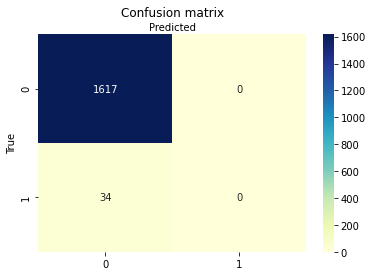

In [20]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

In [21]:
def get_agg_data(col_name):
    d = {}
    columns = ["total_like" , "shares" , "visibility" , "total_love" , "total_wow" , "total_haha" , "total_sad" , "total_angry"]
    err = 0
    for i ,row in old_df[:].iterrows(): # iterating over a pandas Data frame rows in the form of (index, series) pair
        gby = row[col_name]
        
        try:
            if(d.get(gby) == None ):
                d[gby]={}
                for col in columns:
                    d[gby][col] = int(row[col])
                continue
            for col in columns:
                d[gby][col] += int(row[col])
        except:
            err+=1
    return err , d

In [22]:
err , d = get_agg_data("publisher_subjects") # getting the agg data based on publisher subjects
new_df = pd.DataFrame.from_dict(d).T # storing the value of dictionary in new_df

In [23]:
new_df["total_negtive"] = new_df["total_sad"] + new_df["total_angry"] # calculating total_negative based on total_sad and total_angry reaction

In [24]:
new_df["impact"] = [1 if x > 100 else 0 for x in new_df["total_negtive"]] # calculating the impact for the new data frame
new_df

,total_like,shares,visibility,total_love,total_wow,total_haha,total_sad,total_angry,total_negtive,impact
Environmental Sciences,1780,421,1650795,47,14,1,66,27,93,0
Public Health And Health Services,2352,599,1880214,79,54,4,37,13,50,0
Multidisciplinary,12294,5702,12950295,648,706,14,316,204,520,1
Chemical Sciences,5097,1250,3878480,237,80,3,50,142,192,1
Clinical Sciences,13832,7130,38910467,404,590,26,53,12,65,0
...,...,...,...,...,...,...,...,...,...,...
Curriculum And Pedagogy,3,0,1105,0,0,0,0,0,0,0
Biochemistry And Cell Biology,2,0,548,0,0,0,0,0,0,0
Aging,4,0,1642,0,0,0,0,0,0,0
Other Physical Sciences,5,1,14753,0,0,0,0,0,0,0


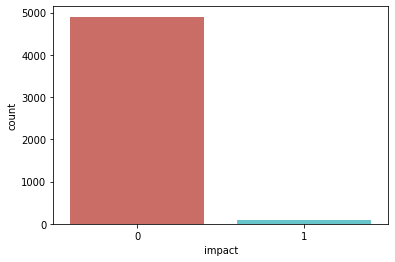

In [25]:
sns.countplot(x="impact",data=df,palette="hls")

## Top 5 article group by  publisher_subject  

- Based on angry react

In [26]:
new_df.sort_values(by ='total_angry' , ascending = False ).head()

,total_like,shares,visibility,total_love,total_wow,total_haha,total_sad,total_angry,total_negtive,impact
Animal Ecology,659,77,2274700,35,6,2,252,278,530,1
Pharmacology And Pharmaceutical Sciences,1666,962,4470203,40,37,4,50,221,271,1
Multidisciplinary,12294,5702,12950295,648,706,14,316,204,520,1
Chemical Sciences,5097,1250,3878480,237,80,3,50,142,192,1
Environmental Sciences,1780,421,1650795,47,14,1,66,27,93,0


- Based on like react

In [27]:
new_df.sort_values(by ='total_like' , ascending = False ).head()

,total_like,shares,visibility,total_love,total_wow,total_haha,total_sad,total_angry,total_negtive,impact
Medical And Health Sciences,21498,6562,50591705,709,298,43,26,19,45,0
Immunology,17038,8193,19594317,614,174,4,7,0,7,0
Clinical Sciences,13832,7130,38910467,404,590,26,53,12,65,0
Multidisciplinary,12294,5702,12950295,648,706,14,316,204,520,1
Physical Sciences,8943,2703,17038975,356,402,25,2,2,4,0


- Based on total_shares

In [28]:
new_df.sort_values(by ='shares' , ascending = False ).head()

,total_like,shares,visibility,total_love,total_wow,total_haha,total_sad,total_angry,total_negtive,impact
Immunology,17038,8193,19594317,614,174,4,7,0,7,0
Clinical Sciences,13832,7130,38910467,404,590,26,53,12,65,0
Medical And Health Sciences,21498,6562,50591705,709,298,43,26,19,45,0
Multidisciplinary,12294,5702,12950295,648,706,14,316,204,520,1
Nursing,7763,4508,19700018,396,146,4,30,3,33,0


- Based on visibility

In [29]:
new_df.sort_values(by ='visibility' , ascending = False ).head()

,total_like,shares,visibility,total_love,total_wow,total_haha,total_sad,total_angry,total_negtive,impact
Medical And Health Sciences,21498,6562,50591705,709,298,43,26,19,45,0
Clinical Sciences,13832,7130,38910467,404,590,26,53,12,65,0
Nursing,7763,4508,19700018,396,146,4,30,3,33,0
Immunology,17038,8193,19594317,614,174,4,7,0,7,0
Physical Sciences,8943,2703,17038975,356,402,25,2,2,4,0


In [30]:
def get_pn_agg_data(col_name):
    d = {} # Creating a dictionary to stroe all the values
    pos_col = ["total_like", "total_love" , "total_wow" , "total_haha" ] # All this reactions are considered as positive column
    neg_col = [ "total_sad" , "total_angry"]  # All this reactions are considered as negative column
    err = 0
    for i ,row in old_df[:].iterrows():
        gby = row[col_name] # Storing  the row of col name in variable name gby
        
        try:
            if(d.get(gby) == None ):
                d[gby]={}
                for col in pos_col:
                    d[gby]["pos"] = int(row[col]) # If the col name is present in pos_col then store the int value of row
                for col in neg_col:
                    d[gby]["neg"] = int(row[col]) # If the col name is present in neg_col then store the int value of row
                continue
            for col in pos_col:
                d[gby]["pos"] += int(row[col]) # Incrementing the value as more values is found in pos_col and store it
            for col in neg_col:
                d[gby]["neg"] += int(row[col]) # Incrementing the value as more values is found in neg_col and store it
        except:
            err+=1
    return err , d

In [31]:
err , d = get_pn_agg_data("publisher_subjects") # getting the agg data based on publisher subjects
new_df = pd.DataFrame.from_dict(d).T # storing the value of dictionary in new_df

In [32]:
new_df

,pos,neg
Environmental Sciences,1319,89
Public Health And Health Services,2334,19
Multidisciplinary,13586,501
Chemical Sciences,5393,191
Clinical Sciences,14851,65
...,...,...
Curriculum And Pedagogy,0,0
Biochemistry And Cell Biology,1,0
Aging,2,0
Other Physical Sciences,0,0


## 5 Articles that have positive impact based on the reaction by the user on Facebook 

In [33]:
new_df.sort_values(by ='pos' , ascending = False ).head()

,pos,neg
Medical And Health Sciences,22542,45
Immunology,17820,7
Clinical Sciences,14851,65
Multidisciplinary,13586,501
Physical Sciences,9584,4


## 5 Articles that have negative impact based on the reaction by the user on Facebook 

In [34]:
new_df.sort_values(by ='neg' , ascending = False ).head()

,pos,neg
Multidisciplinary,13586,501
Animal Ecology,71,278
Pharmacology And Pharmaceutical Sciences,1727,271
Chemical Sciences,5393,191
Environmental Sciences,1319,89
